## Data Loading And Preprocessing

In [1]:
# Importing necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Column names list
column_names = ["Id", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type of glass"]

# Loading the Dataset
url="https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Glass%20Identification/Glass%20Identification.csv"
df=pd.read_csv(url,header=None,names=column_names)

In [3]:
df

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
df.sample(5)

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
142,143,1.51662,12.85,3.51,1.44,73.01,0.68,8.23,0.06,0.25,2
94,95,1.51629,12.71,3.33,1.49,73.28,0.67,8.24,0.00,0.00,2
145,146,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.00,0.35,2
39,40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00,1
205,206,1.51732,14.95,0.00,1.80,72.99,0.00,8.61,1.55,0.00,7


As we can see this is a classification problem . There are 214 rows and 11 columns. All columns have numerical datatype. "Type of glass" is our Target Varible and others are input variables.

In [5]:
df.dtypes

Id                 int64
RI               float64
Na               float64
Mg               float64
Al               float64
Si               float64
K                float64
Ca               float64
Ba               float64
Fe               float64
Type of glass      int64
dtype: object

In [6]:
# Checking for Missing Values
df.isnull().sum()

Id               0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

As we can see there are no missing values in our dataset.

In [7]:
# Checking for Number of Unique Values
df.nunique()

Id               214
RI               178
Na               142
Mg                94
Al               118
Si               133
K                 65
Ca               143
Ba                34
Fe                32
Type of glass      6
dtype: int64

In [8]:
# Droping the 'Id' column since it's not a important
df = df.drop(columns=['Id'])

## Exploratory Data Analysis (EDA)

<Axes: xlabel='Type of glass', ylabel='count'>

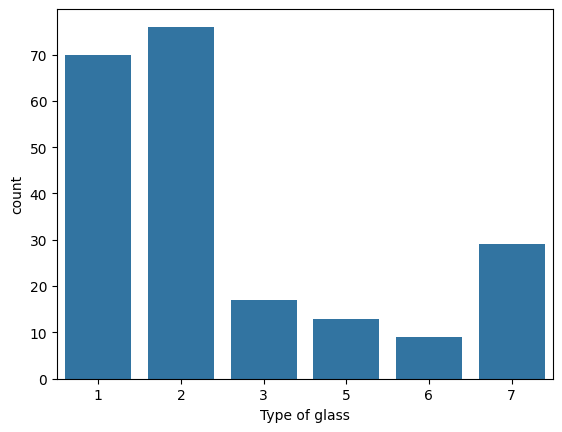

In [9]:
sns.countplot(data=df,x="Type of glass")

As we can see glass type 1 and 2 are way higher than other types that means our target is imbalanced.

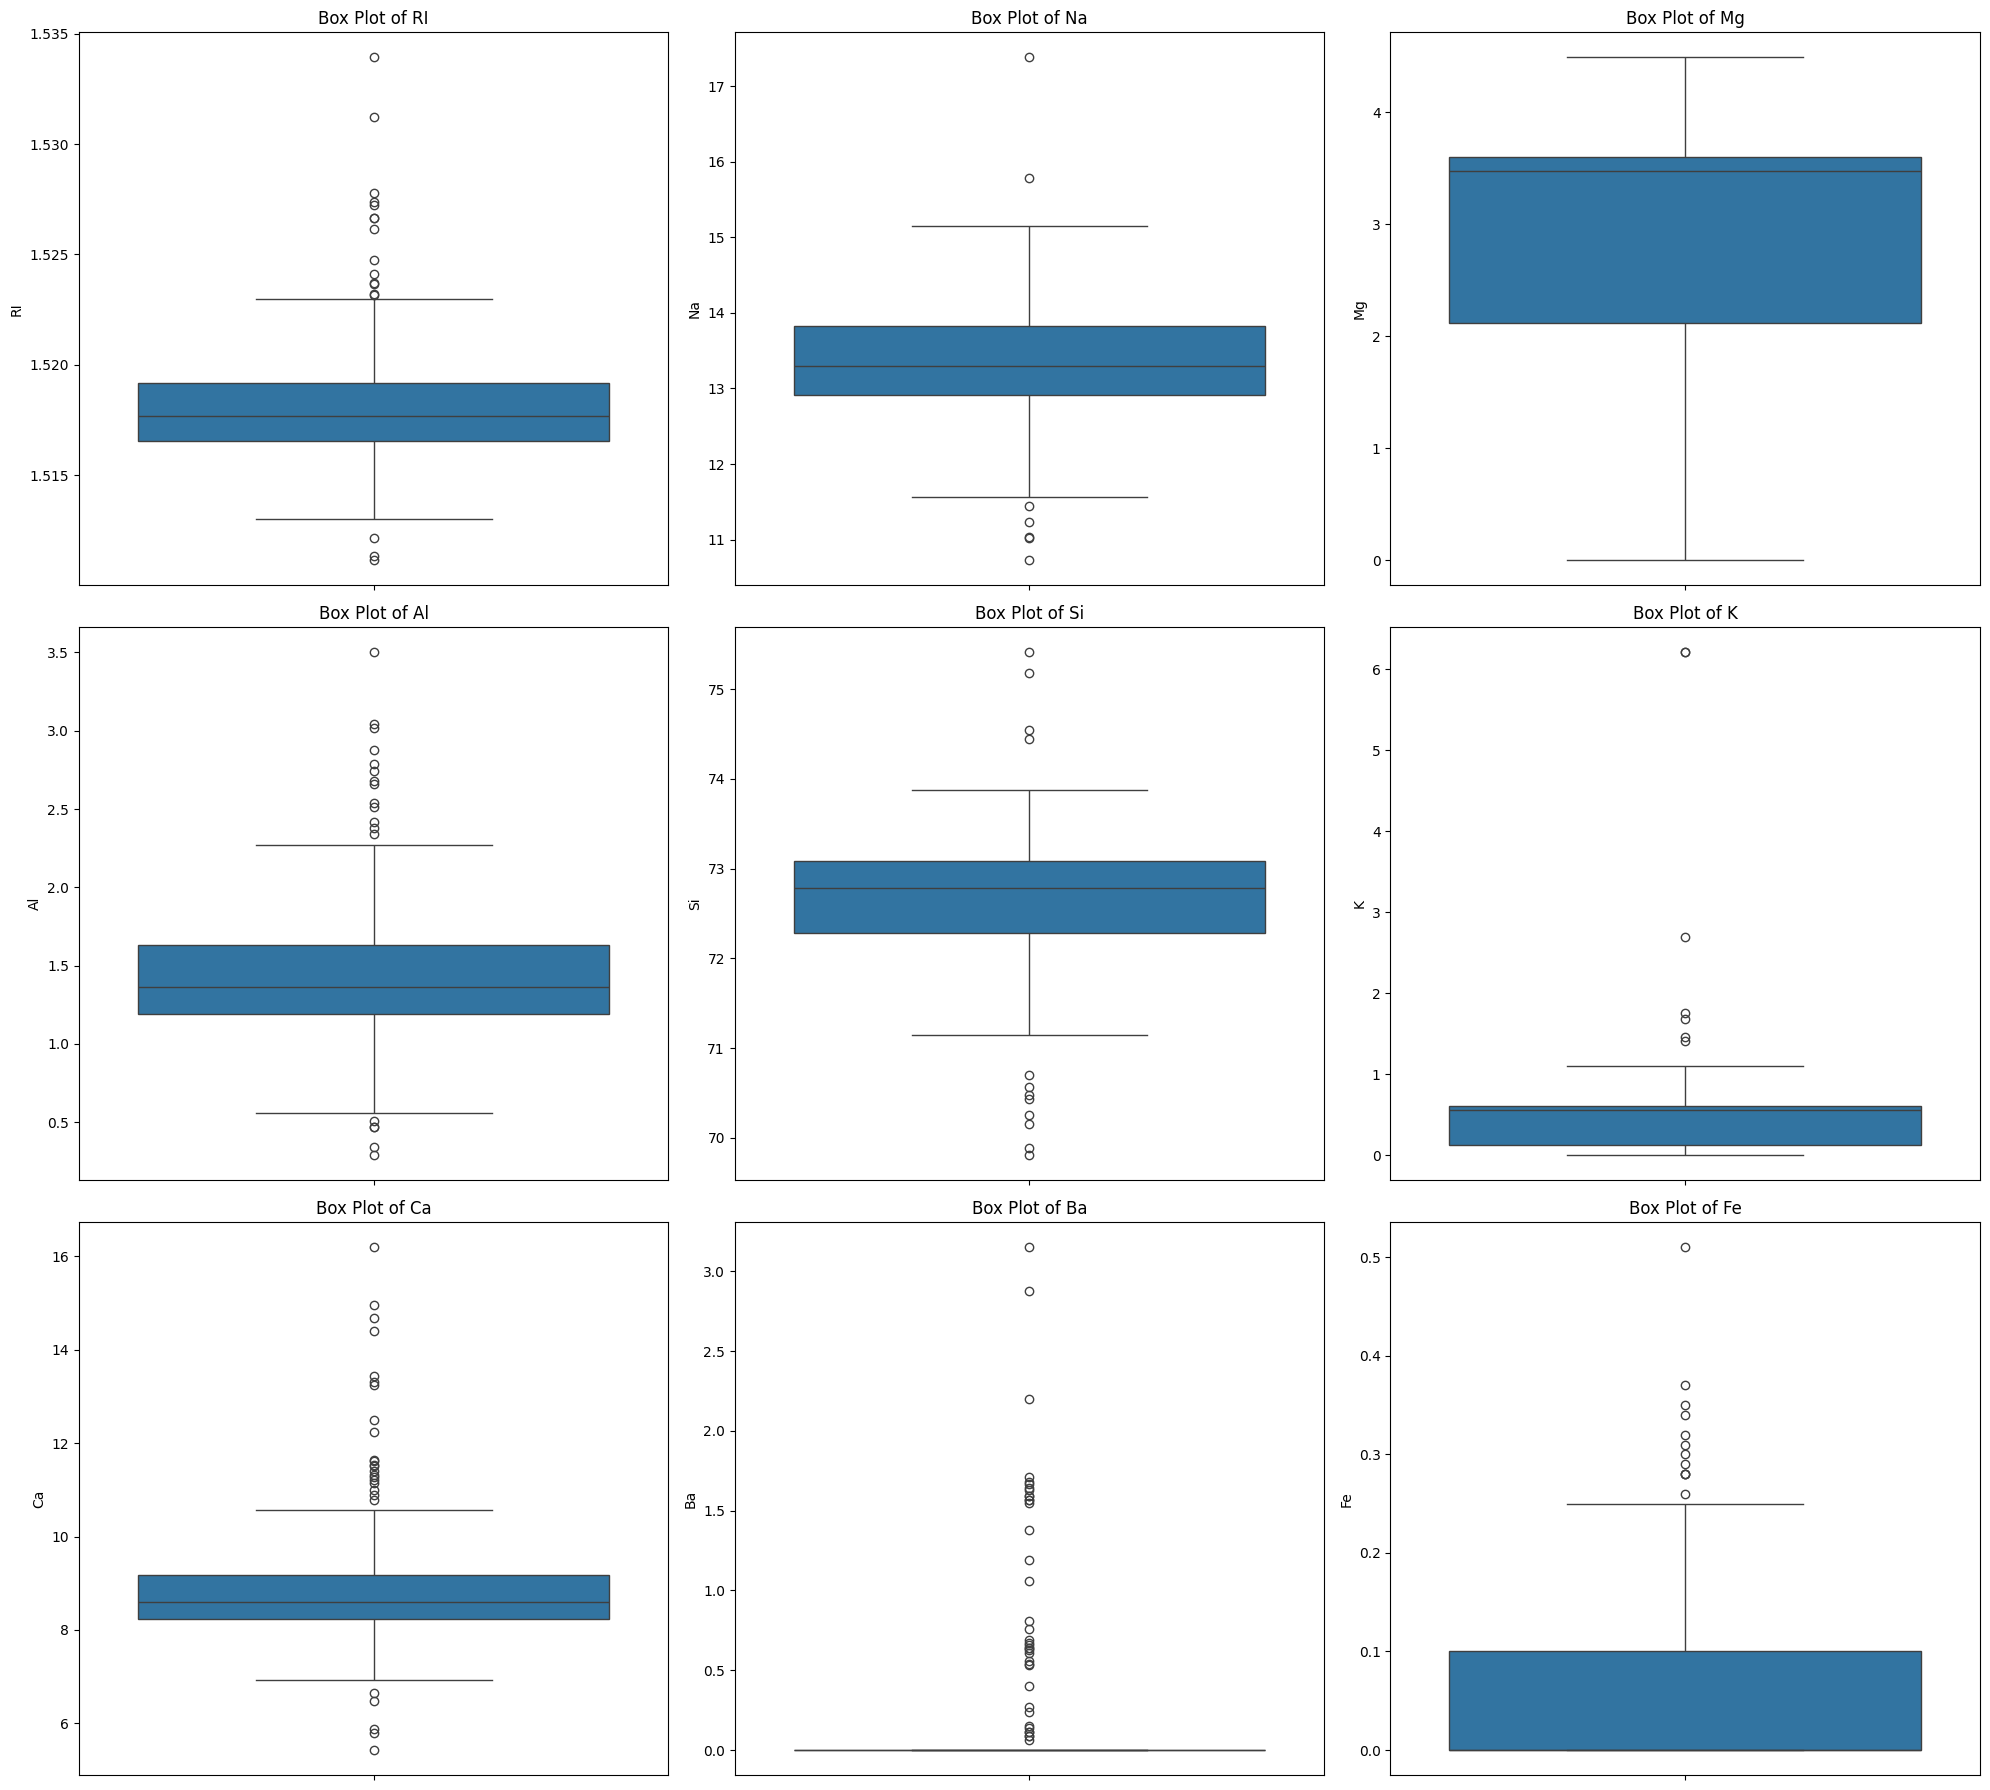

In [10]:
features = df.columns[:-1]
fig, axes = plt.subplots(3, 3, figsize=(20, 18))
axes = axes.flatten()

# Creating box plots for each feature 
for i, column in enumerate(features):
    sns.boxplot(y=df[column], ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

From the output above we can sense the presence of outliers in our dataset.

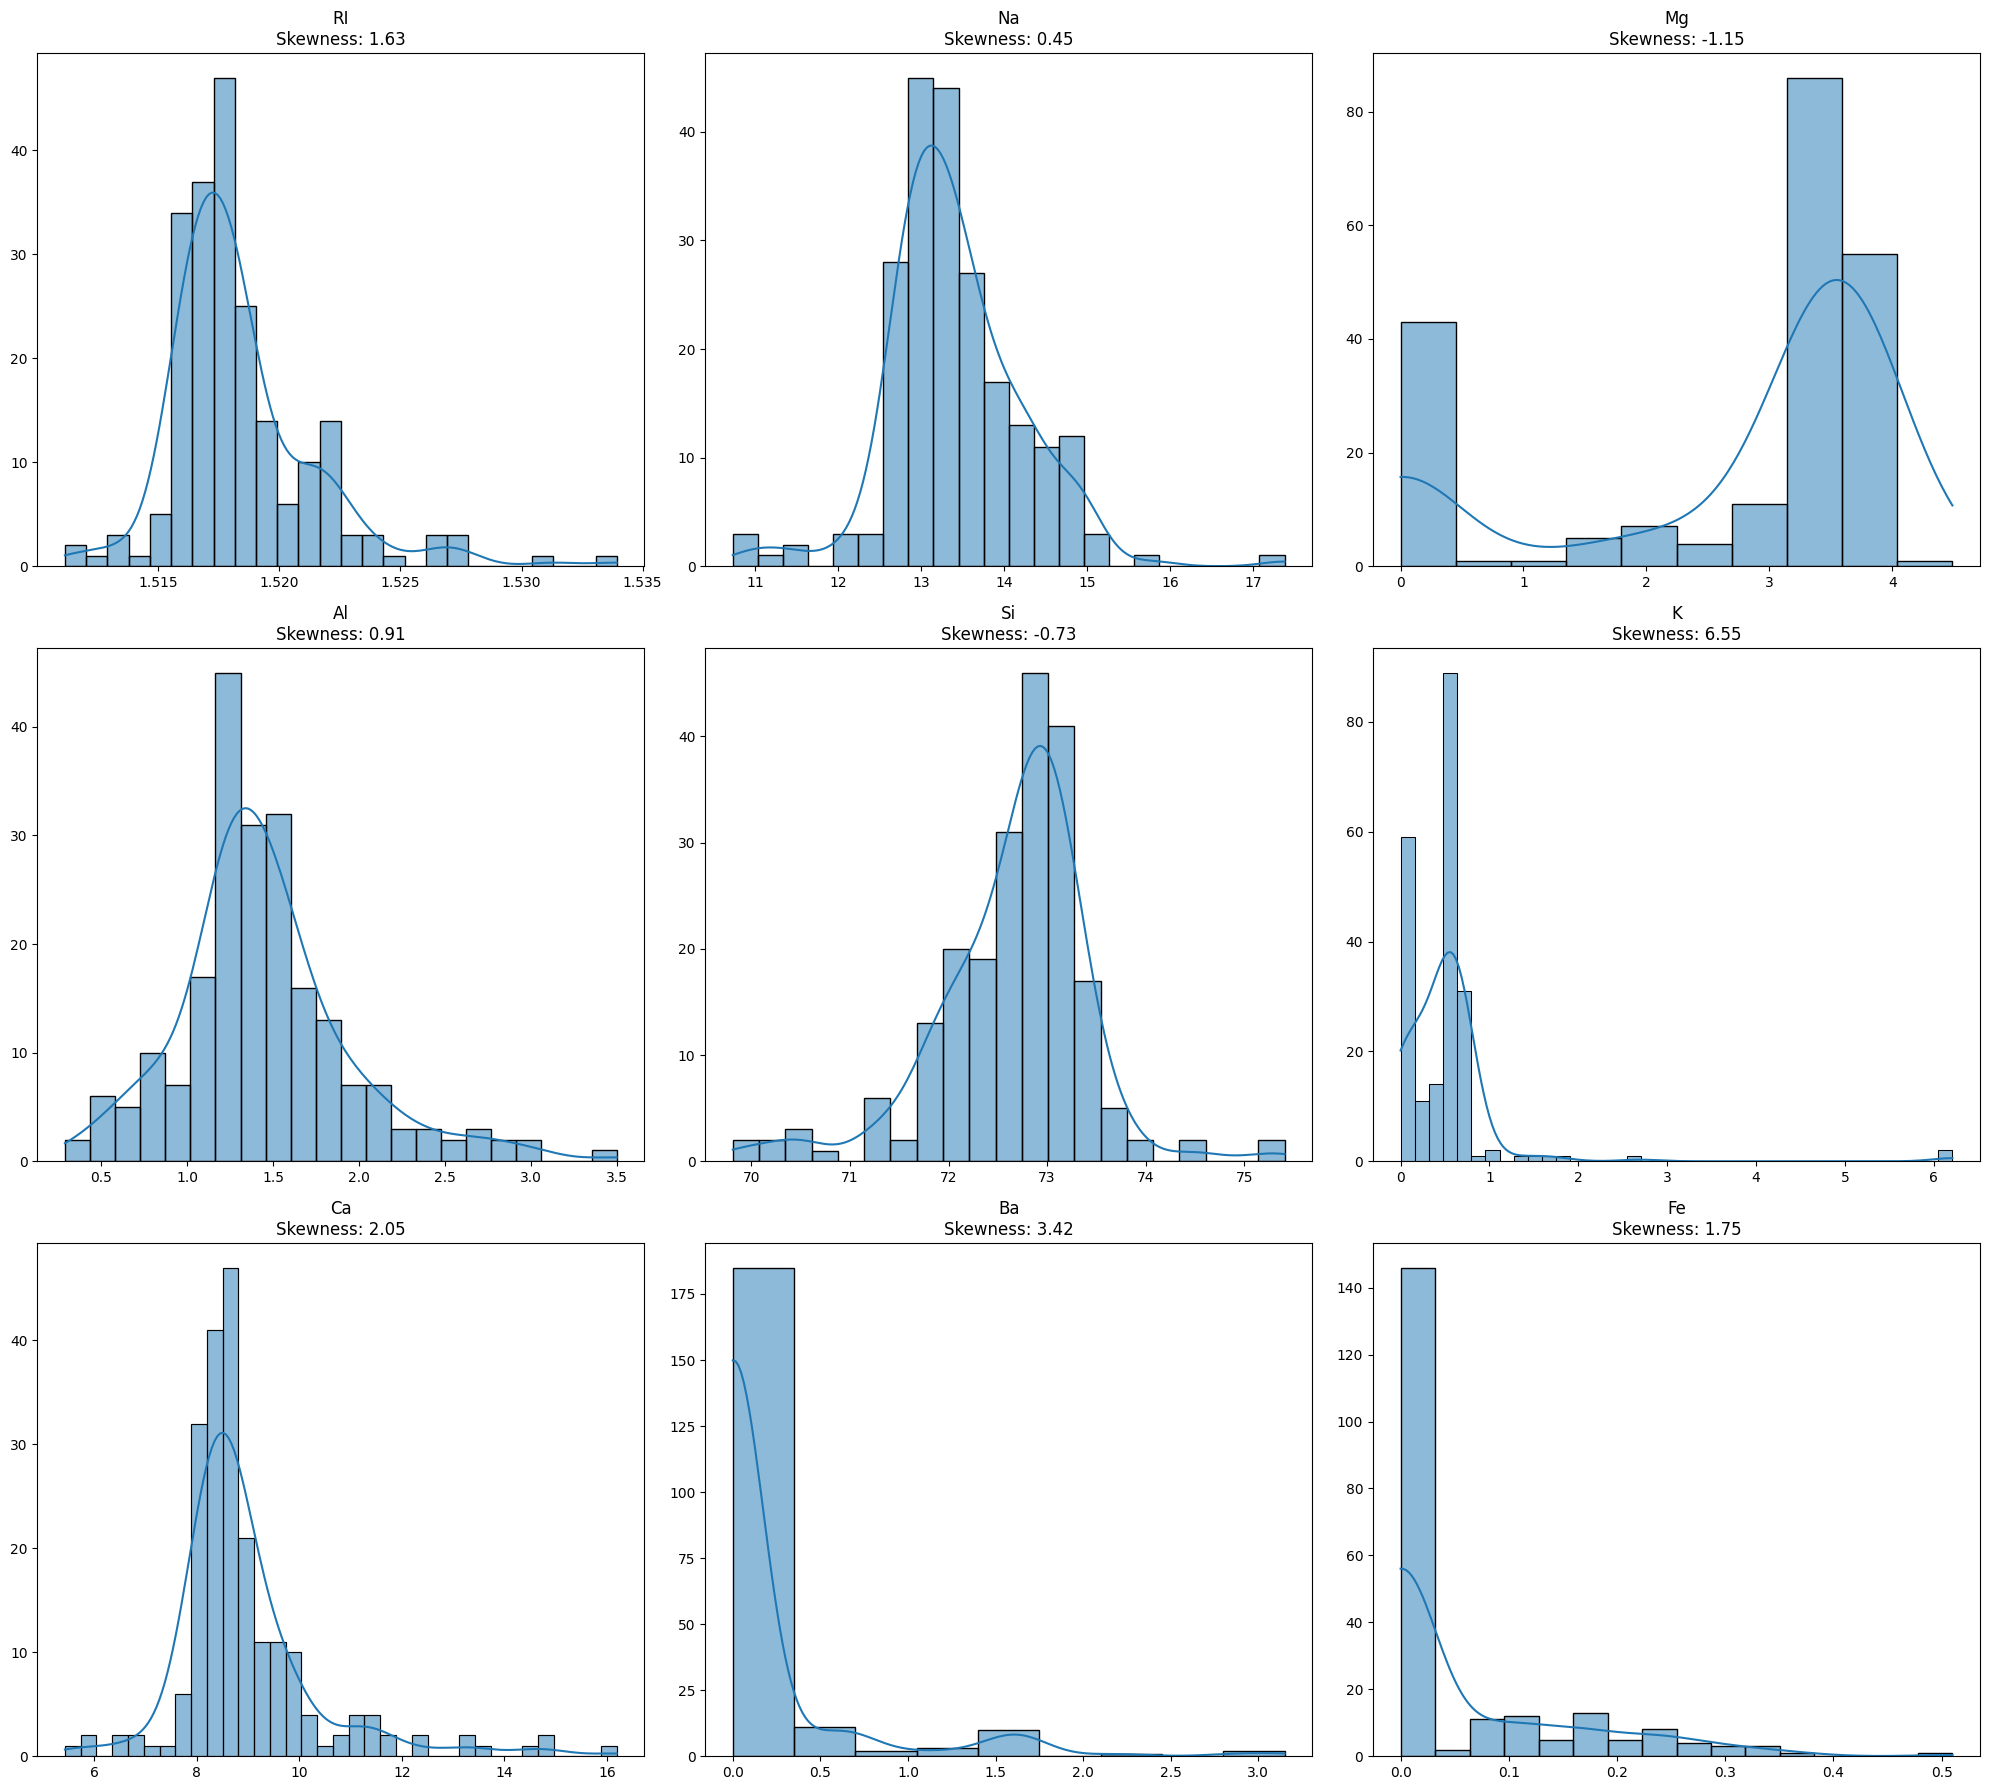

In [11]:
# Creating histograms for each feature to check skewness
features = df.columns[:-1]

fig, axes = plt.subplots(3, 3, figsize=(20, 18))

axes = axes.flatten()
for i, column in enumerate(features):
    sns.histplot(df[column], ax=axes[i], kde=True)
    skewness = df[column].skew()
    axes[i].set_title(f'{column}\nSkewness: {skewness:.2f}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    
plt.tight_layout()
plt.show()

All the features except "mg" and "si" are right tailed and some of them are highly skewed.

In [12]:
# Checking Summary Statistics
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


We can sense the sudden jump between 75 percentile and maximum percentile in many features like Na,Al,K,Ca,Ba,Fe and there is presence of 0 in Ba and Fe. Apart from that we can also see that our data is not scaled.

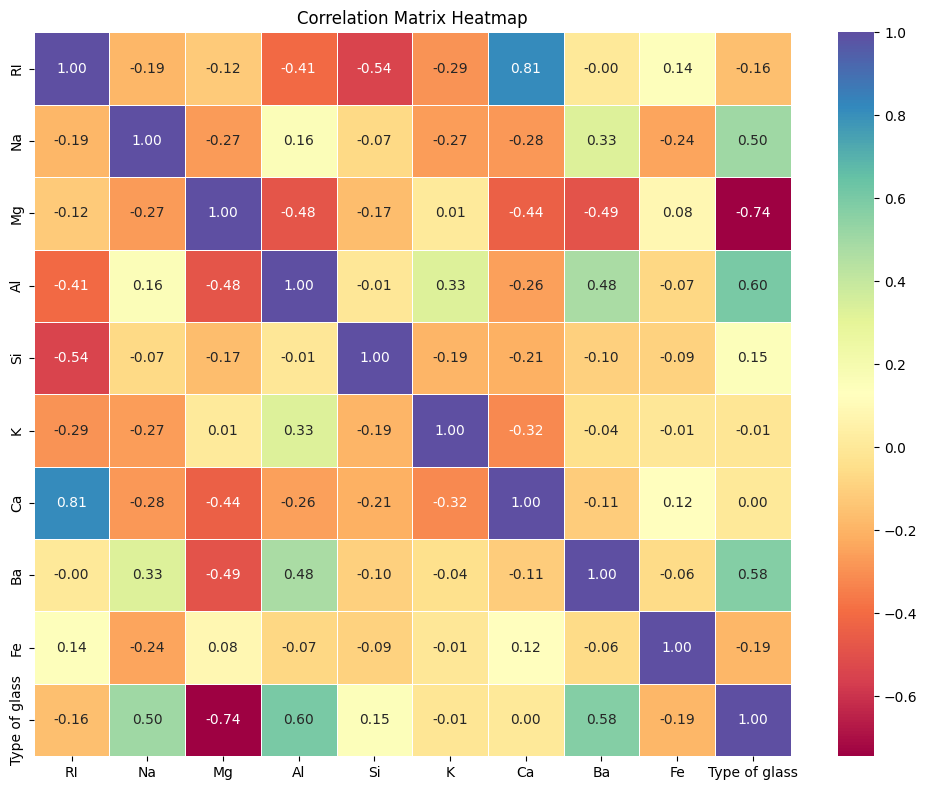

In [13]:
# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, annot=True, cmap='Spectral', fmt=".2f", linewidths=0.5)  
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

## Data Treatment

In [15]:
df.shape

(214, 10)

In [16]:
# Removing Outliers

# Defining a function to remove outliers using Z-score method
def remove_outliers_zscore(df, threshold=3):
    z_scores = (df - df.mean()) / df.std()  
    return df[(z_scores.abs() < threshold).all(axis=1)]  

# Removing outliers from numeric columns 
numeric_columns = df.select_dtypes(include=np.number).columns
df1 = remove_outliers_zscore(df[numeric_columns])

# Displaying the shape of the original and modified DataFrame
print("Original Shape:", df.shape)
print("Shape after removing outliers:", df1.shape)

Original Shape: (214, 10)
Shape after removing outliers: (194, 10)


In [17]:
df.skew()

RI               1.625431
Na               0.454181
Mg              -1.152559
Al               0.907290
Si              -0.730447
K                6.551648
Ca               2.047054
Ba               3.416425
Fe               1.754327
Type of glass    1.114915
dtype: float64

In [18]:
# Removing skewness from K,Ca,Ba,Fe
import scipy
from scipy.stats import boxcox

# Defining the columns to treat skewness
cols_to_treat = ['K', 'Ca', 'Ba', 'Fe']

# Applying Box-Cox transformation to each column
for column in cols_to_treat:
    df1[column], _ = boxcox(df1[column] + 1)  # Adding 1 to handle zero values

# Check the skewness after transformation
skewness_after_transformation = df1.skew()
print("Skewness after transformation:")
print(skewness_after_transformation)

Skewness after transformation:
RI               1.625431
Na               0.454181
Mg              -1.152559
Al               0.907290
Si              -0.730447
K                6.551648
Ca               2.047054
Ba               3.416425
Fe               1.754327
Type of glass    1.114915
dtype: float64


In [20]:
# Scaling the Features

from sklearn.preprocessing import StandardScaler

# Separating Feature and Target Variable
x=df1.drop(columns=["Type of glass"])
y=df1["Type of glass"]

# Initializing the StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

# Converting the scaled features back to a DataFrame
X = pd.DataFrame(X_scaled, columns=x.columns)

# Display the scaled features
print(X.head())


         RI        Na        Mg        Al        Si         K        Ca  \
0  1.291781  0.332127  1.233397 -0.729105 -1.612464 -1.348170  0.001118   
1 -0.197832  0.704398  0.551581 -0.141722  0.016082  0.204416 -1.057157   
2 -0.824346  0.168328  0.513277  0.264928  0.461790 -0.114085 -1.119780   
3 -0.175926 -0.308179  0.620529 -0.299864 -0.189629  0.516387 -0.587678   
4 -0.281075 -0.218834  0.566903 -0.412822  0.616073  0.447598 -0.764376   

         Ba        Fe  
0 -0.429499 -0.677737  
1 -0.429499 -0.677737  
2 -0.429499 -0.677737  
3 -0.429499 -0.677737  
4 -0.429499 -0.677737  


In [21]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.291781,0.332127,1.233397,-0.729105,-1.612464,-1.348170,0.001118,-0.429499,-0.677737
1,-0.197832,0.704398,0.551581,-0.141722,0.016082,0.204416,-1.057157,-0.429499,-0.677737
2,-0.824346,0.168328,0.513277,0.264928,0.461790,-0.114085,-1.119780,-0.429499,-0.677737
3,-0.175926,-0.308179,0.620529,-0.299864,-0.189629,0.516387,-0.587678,-0.429499,-0.677737
4,-0.281075,-0.218834,0.566903,-0.412822,0.616073,0.447598,-0.764376,-0.429499,-0.677737
...,...,...,...,...,...,...,...,...,...
189,-0.727959,1.419158,-2.206325,2.975928,0.221793,-1.585876,0.703768,2.473388,-0.677737
190,-0.802440,1.076668,-2.206325,3.292211,-0.189629,-1.269960,0.442024,2.497782,-0.677737
191,-0.530805,2.238153,-2.206325,1.281553,0.581788,-1.585876,-0.381688,2.498738,-0.677737
192,1.134057,1.404267,-2.206325,1.349328,1.198921,-1.585876,-0.336778,2.498753,-0.677737


In [22]:
# Dividing dataset into window glass (classes 1-4) and non-window glass (classes 5-7).
# Window glass means 1 and Non-window glass means 0

# Defining a mapping function to convert class labels to binary values and update class names
def map_class_labels(label):
    if label in [1, 2, 3, 4]:
        return 1  # Window glass
    elif label in [5, 6, 7]:
        return 0  # Non-window glass

# Applying the mapping function to convert class labels and update class names
Y = y.map(map_class_labels)

# Updating class names
class_names = {1: "window glass", 0: "non-window glass"}

# Print class distribution
class_distribution = Y.map(class_names).value_counts()
print("Class Distribution:")
print(class_distribution)

# Printing first few elements of y after mapping
print("\nFirst few elements of y after mapping:")
print(Y.head())

Class Distribution:
window glass        154
non-window glass     40
Name: Type of glass, dtype: int64

First few elements of y after mapping:
0    1
1    1
2    1
3    1
4    1
Name: Type of glass, dtype: int64


In [34]:
Y.value_counts()

1    154
0     40
Name: Type of glass, dtype: int64

We can see that our Data is imbalanced and needs to be treated.

In [36]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x,y=smt.fit_resample(X,Y)

In [37]:
x.shape

(308, 9)

In [38]:
y.shape

(308,)

## Train Test Split

In [39]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=42)

In [40]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(215, 9)
(93, 9)
(215,)
(93,)


## Model Training and Evaluation

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [42]:
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

# Training and evaluating each classifier
for name, clf in classifiers.items():
    # Training the model
    clf.fit(xtrain, ytrain)
    
    # Predicting on the training set
    y_train_pred = clf.predict(xtrain)
    
    # Predicting on the testing set
    y_test_pred = clf.predict(xtest)
    
    # Evaluating the model on the training set
    train_accuracy = accuracy_score(ytrain, y_train_pred)
    print(f"{name} Training Accuracy: {train_accuracy:.4f}")
    print(f"{name} Training Classification Report:\n{classification_report(ytrain, y_train_pred)}\n")
    print(f"{name} Training Confusion Matrix:\n{confusion_matrix(ytrain,y_train_pred)}\n")
    
    # Evaluating the model on the testing set
    test_accuracy = accuracy_score(ytest, y_test_pred)
    print(f"{name} Test Accuracy: {test_accuracy:.4f}")
    print(f"{name} Test Classification Report:\n{classification_report(ytest, y_test_pred)}\n")
    print(f"{name} Test Confusion Matrix:\n{confusion_matrix(ytest,y_test_pred)}\n")
    

Logistic Regression Training Accuracy: 0.9628
Logistic Regression Training Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       110
           1       0.95      0.97      0.96       105

    accuracy                           0.96       215
   macro avg       0.96      0.96      0.96       215
weighted avg       0.96      0.96      0.96       215


Logistic Regression Training Confusion Matrix:
[[105   5]
 [  3 102]]

Logistic Regression Test Accuracy: 0.9355
Logistic Regression Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.86      0.93        44
           1       0.89      1.00      0.94        49

    accuracy                           0.94        93
   macro avg       0.95      0.93      0.93        93
weighted avg       0.94      0.94      0.93        93


Logistic Regression Test Confusion Matrix:
[[38  6]
 [ 0 49]]

Decision Tree Training

From the output above it is clear that our best performing model is SVM with Test Accuracy: 0.9785

In [44]:
svm_model = SVC()
svm_model.fit(xtrain,ytrain)

# Predicting on the test set
y_test_pred = svm_model.predict(xtest)

# Evaluating the model on the test set
test_accuracy = accuracy_score(ytest, y_test_pred)
print(f"SVM Test Accuracy: {test_accuracy:.4f}")
print(f"SVM Test Classification Report:\n{classification_report(ytest, y_test_pred)}\n")

SVM Test Accuracy: 0.9785
SVM Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        44
           1       0.96      1.00      0.98        49

    accuracy                           0.98        93
   macro avg       0.98      0.98      0.98        93
weighted avg       0.98      0.98      0.98        93




## Saving the best Model

In [47]:
import joblib
filename = 'svm_glass_classification_model.joblib'
joblib.dump(svm_model, filename)
print(f"SVM model saved as {filename}")

SVM model saved as svm_glass_classification_model.joblib
